# COIN-OR Makespan

In [1]:
# Datenzugriff
from configs.path_manager import get_path

# Utils
import src.utils.presenter as show
from src.utils.production_process import convert
from src.utils.production_process import initialize as init
from src.utils.analize import check_constrains as check

# Solver Model
from src.models.lp import makespan as lp_makespan

# Extern
import pandas as pd

In [2]:
max_time = 60*15 # 15 min

In [10]:
# Datei laden
basic_data_path = get_path("data", "basic")
df_instance = pd.read_csv(basic_data_path / "instance.csv")
df_jssp, df_jobs_arrivals = init.create_jobs_for_shifts(df_routings = df_instance,
                                                        routing_column = "Routing_ID", job_column = "Job",
                                                        shift_count = 1, shift_length = 990,
                                                        u_b_mmax = 0.98, shuffle = False
                                                       )
df_jobs_arrivals

,Job,Routing_ID,Arrival,Ready Time
0,0,0,72,990
1,1,1,119,990
2,2,2,182,990
3,3,3,223,990
4,4,4,263,990
5,5,5,457,990
6,6,6,726,990
7,7,7,850,990
8,8,8,907,990
9,9,9,922,990


### a) CBC - COIN-OR Branch and Cut

In [12]:
# Scheduling
df_schedule = lp_makespan.solve_jssp_with_arrival(df_jssp, df_jobs_arrivals, solver= "CBC", 
                                                          var_cat = "Integer", msg=False, timeLimit=max_time)
df_schedule

BigM: 6900

Solver-Informationen:
  Makespan                : 1656.0
  Solver-Status           : Optimal
  Anzahl Variablen        : 781
  Anzahl Constraints      : 1440
  Laufzeit                : ~64.91 Sekunden


,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,0,0,72,M00,72.0,29.0,29.0,101.0
1,0,1,72,M01,101.0,78.0,107.0,179.0
2,1,0,119,M00,119.0,43.0,43.0,162.0
3,0,2,72,M02,179.0,9.0,116.0,188.0
4,2,0,182,M01,182.0,91.0,91.0,273.0
...,...,...,...,...,...,...,...,...
115,7,9,850,M03,1577.0,79.0,806.0,1656.0
116,10,8,942,M08,1582.0,44.0,684.0,1626.0
117,9,9,922,M07,1611.0,45.0,734.0,1656.0
118,11,9,946,M08,1626.0,30.0,710.0,1656.0


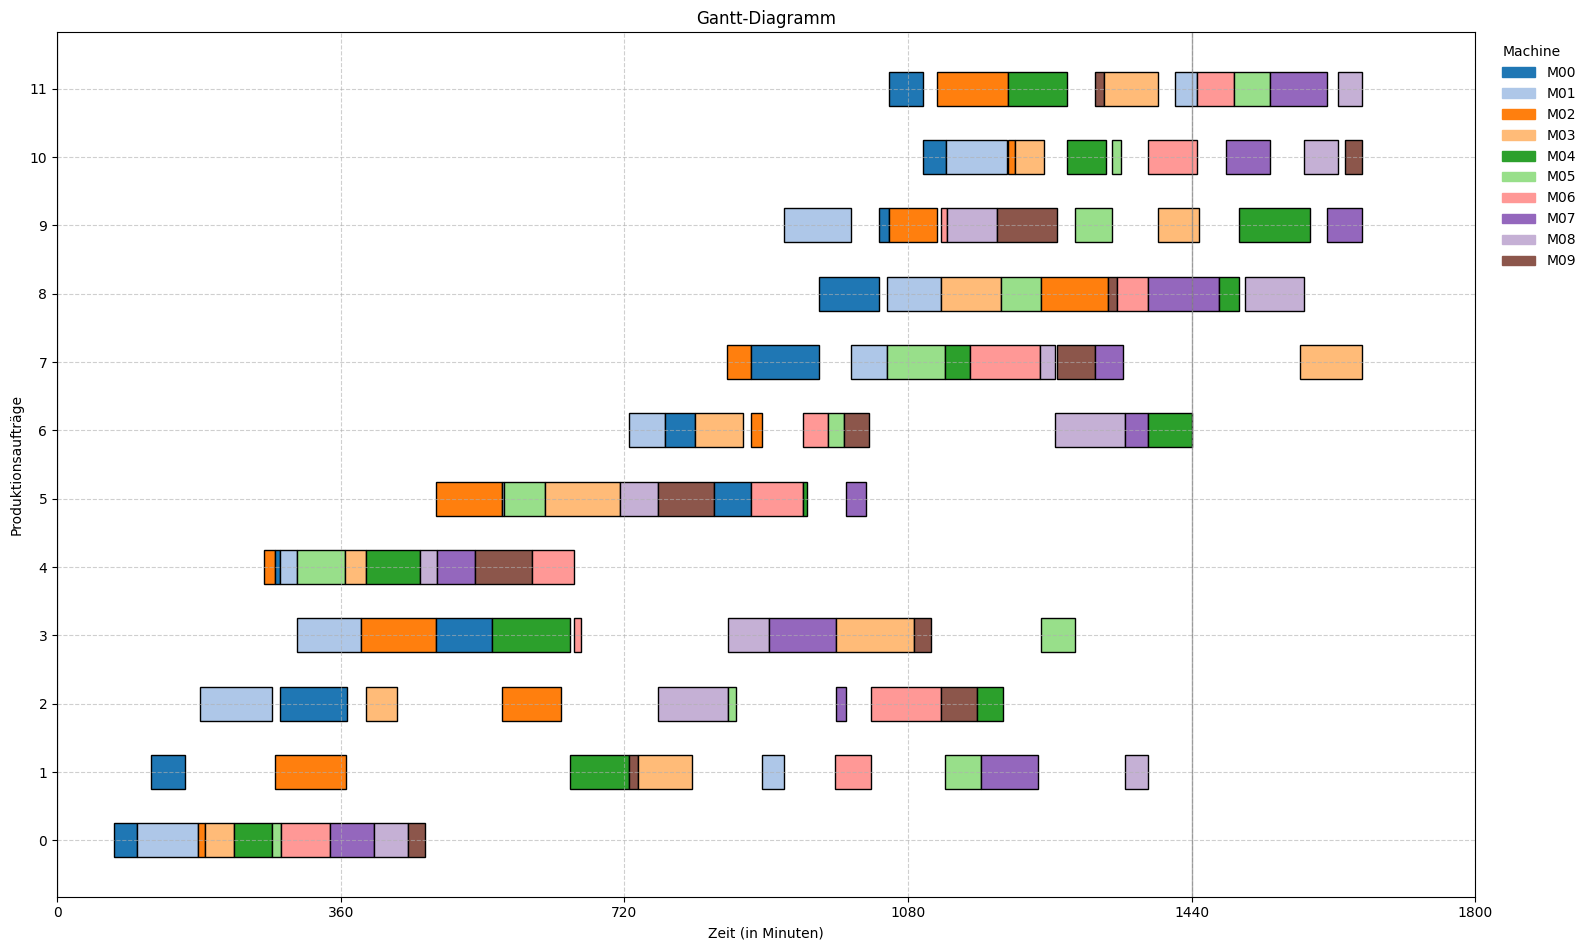

In [13]:
show.plot_gantt(df_schedule, perspective="Job")

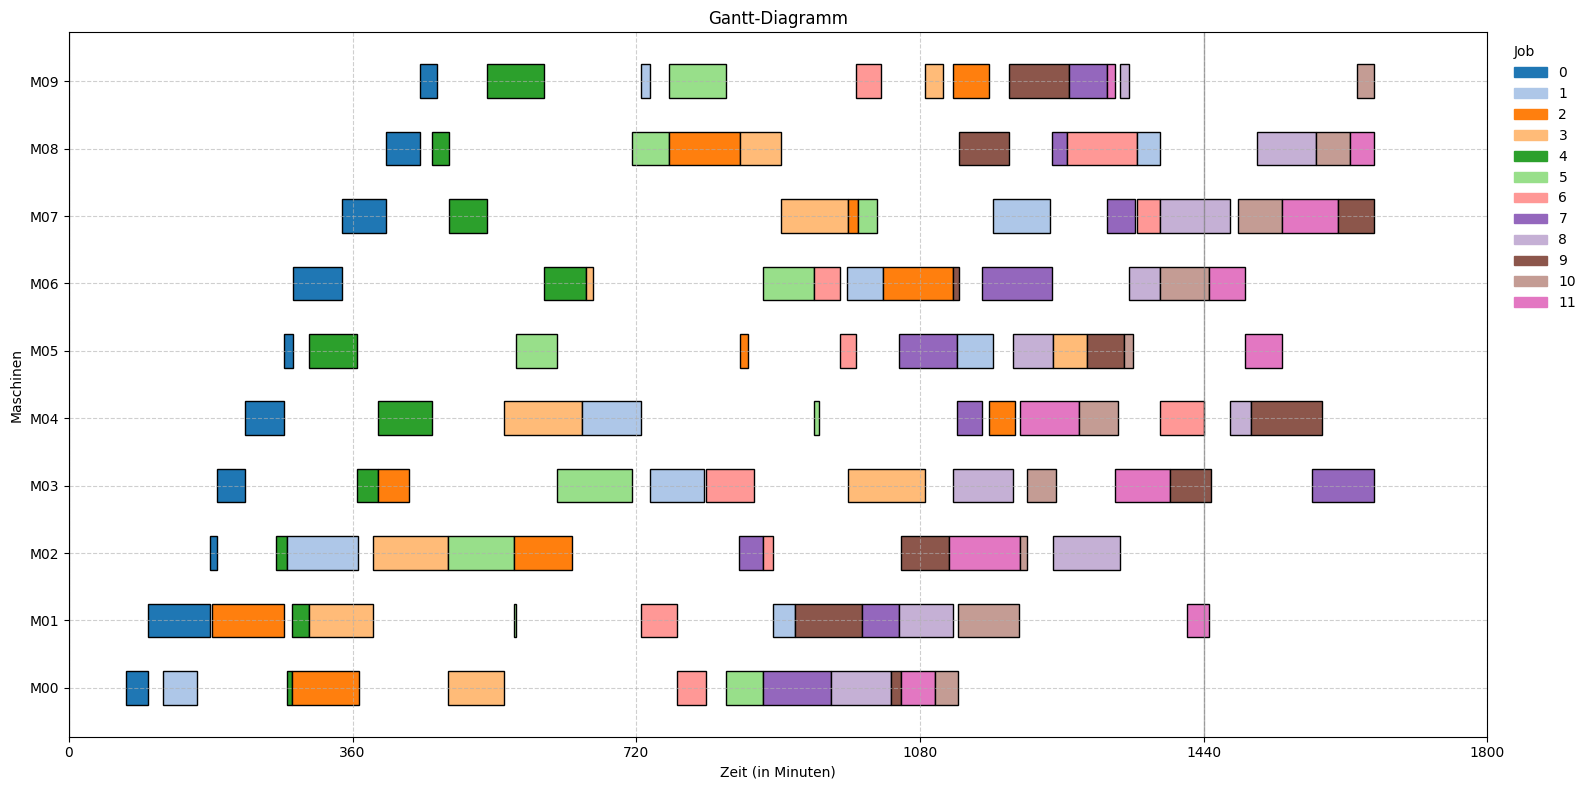

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.


True

In [14]:
show.plot_gantt(df_schedule, perspective="Machine")
check.is_machine_conflict_free(df_schedule)
check.is_operation_sequence_correct(df_schedule)
check.is_job_timing_correct(df_schedule)


### b) HiGHS mit PuLP

In [ ]:
# Scheduling
df_schedule = lp_makespan.solve_jssp_with_arrival(df_jssp, df_jobs_arrivals, solver= "HiGHS",
                                                          var_cat = "Integer", msg=False, timeLimit=max_time)
df_schedule

In [ ]:
show.plot_gantt(df_schedule, perspective="Machine")
check.is_machine_conflict_free(df_schedule)
check.is_operation_sequence_correct(df_schedule)
check.is_job_timing_correct(df_schedule)